In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from rmse_calculator import rmse_calc
from cd_detector import cd_detector
from rmse_plot_generator import plot_gen as rpg

In [2]:
df = pd.read_csv('DCN-iterate_1658684509_predictions.csv')
df

,Unnamed: 0,user_id,movie_id,user_rating,timestamp,user_occupation,user_age_cohort,user_gender,pred_rating,pred_int_rating
0,43660,798,52,3,876176979,1,3,0,2.589300,3
1,87278,709,849,4,879848590,10,2,1,3.834248,4
2,14317,785,79,4,879438984,9,5,1,4.254503,4
3,81932,435,139,2,884134134,9,2,1,2.310845,2
4,95321,435,444,3,884134075,9,2,1,3.037222,3
...,...,...,...,...,...,...,...,...,...,...
95,31901,468,89,4,875291722,9,5,1,4.769455,5
96,56164,830,313,5,891462165,2,1,1,4.998848,5
97,14445,94,829,2,891724800,6,5,1,2.842433,3
98,78693,130,436,3,875801573,19,2,1,3.319857,3


In [3]:
# Define RMSE function

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [4]:
# Fetch data for RMSE calculations
rmse(df['pred_int_rating'], df['user_rating'])

0.7810249675906654

In [5]:
# Sort by timestamp
df_sorted = df.sort_values(by=['timestamp'])
df_sorted

# Convert timestamp to date
df_sorted['date'] = pd.to_datetime(df_sorted['timestamp'], unit='s')
df_sorted

,Unnamed: 0,user_id,movie_id,user_rating,timestamp,user_occupation,user_age_cohort,user_gender,pred_rating,pred_int_rating,date
49,1217,640,663,5,874778240,6,2,1,5.247589,5,1997-09-20 17:57:20
27,27706,640,231,5,874778424,6,2,1,3.633689,4,1997-09-20 18:00:24
78,40272,291,164,4,874834875,6,2,1,4.719562,5,1997-09-21 09:41:15
15,45417,291,200,4,874867740,6,2,1,4.536109,5,1997-09-21 18:49:00
32,82950,346,831,3,875003274,10,5,1,3.056947,3,1997-09-23 08:27:54
...,...,...,...,...,...,...,...,...,...,...,...
28,92621,234,1126,4,892079722,4,4,1,3.900551,4,1998-04-08 23:55:22
37,72719,796,480,4,892663155,1,5,0,4.889626,5,1998-04-15 17:59:15
67,49274,56,169,4,892683248,17,5,1,4.636249,5,1998-04-15 23:34:08
17,91216,776,567,2,892920351,17,5,1,3.029765,3,1998-04-18 17:25:51


In [6]:
df_rmse = df_sorted[['date', 'user_rating', 'pred_rating']]
df_rmse

df_sorted.groupby(pd.Grouper(key="date", freq="M")).mean()

,Unnamed: 0,user_id,movie_id,user_rating,timestamp,user_occupation,user_age_cohort,user_gender,pred_rating,pred_int_rating
date,,,,,,,,,,
1997-09-30,56039.111111,494.222222,574.888889,3.666667,8.750276e+08,7.111111,3.333333,0.888889,3.816806,3.888889
1997-10-31,43619.111111,554.888889,358.666667,3.777778,8.766545e+08,8.333333,3.111111,0.666667,3.640777,3.666667
1997-11-30,45289.760000,423.440000,338.320000,3.720000,8.795489e+08,9.280000,4.000000,0.760000,3.774238,3.720000
1997-12-31,40815.000000,445.000000,509.000000,3.600000,8.820814e+08,9.000000,3.800000,1.000000,3.807258,3.700000
1998-01-31,62016.333333,415.388889,482.722222,3.333333,8.847413e+08,9.333333,4.000000,0.722222,3.332124,3.333333
1998-02-28,52021.300000,557.600000,407.300000,3.100000,8.878815e+08,7.400000,3.700000,0.800000,3.525895,3.400000
1998-03-31,41107.300000,641.400000,509.000000,3.400000,8.904225e+08,10.100000,3.900000,0.500000,3.577853,3.600000
1998-04-30,62464.222222,376.555556,539.333333,3.666667,8.922483e+08,8.777778,4.444444,0.777778,3.892981,3.888889


In [9]:
# Group by date and calculate the rmse for each month/week/year
rmse_float = df_sorted[['date', 'user_rating', 'pred_rating']].groupby(pd.Grouper(key="date", freq="M")).apply(lambda x: rmse(x.pred_rating, x.user_rating))
rmse_int = df_sorted[['date', 'user_rating', 'pred_int_rating']].groupby(pd.Grouper(key="date", freq="M")).apply(lambda x: rmse(x.pred_int_rating, x.user_rating))

rmse_df = pd.DataFrame(dict(rmse_float = rmse_float, rmse_int = rmse_int))
rmse_df

,rmse_float,rmse_int
date,,
1997-09-30,0.620132,0.666667
1997-10-31,0.911262,0.881917
1997-11-30,0.642733,0.632456
1997-12-31,1.266515,1.048809
1998-01-31,0.693589,0.666667
1998-02-28,0.772934,0.707107
1998-03-31,1.032992,0.894427
1998-04-30,0.793748,0.942809


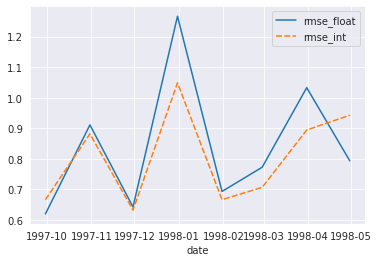

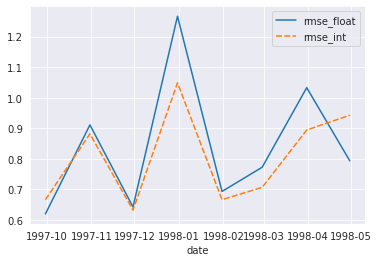

In [10]:
rpg(rmse_df, "rmse_trend.png")

In [6]:
test = rmse_calc(df_sorted[['date', 'user_rating', 'pred_rating']], "Y")
test

date
1997-12-31    0.838945
1998-12-31    0.811808
Freq: A-DEC, dtype: float64

In [21]:
print(cd_detector(rmse_df, delta_threshold=0.1, absolute_threshold=1.5))

True


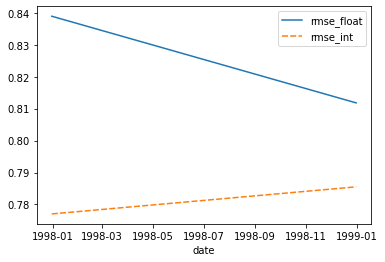

In [31]:
# CD understanding
rmse_trend = sns.lineplot(data = rmse_df)

In [32]:
# Save plot
fig = rmse_trend.get_figure()
fig.savefig("rmse_trend.png")

In [33]:
rmse_df

,rmse_float,rmse_int
date,,
1997-12-31,0.838945,0.777029
1998-12-31,0.811808,0.785507


In [101]:
# CD detection
rmse_delta_threshold = 0.1  # CD detection is identified if RMSE worsens by a value of 0.1 from the previous entry
rmse_absolute_threshold = 1.5  # CD detection is identified if RMSE surpasses this threshold --> To detect CD over longer periods

rmse_delta = rmse_df.rolling(2).apply(lambda x: x.iloc[1] - x.iloc[0])  # Calculate delta between 2 values within a rolling window
rmse_delta

,rmse_float,rmse_int
date,,
1997-12-31,NaN,NaN
1998-12-31,-0.027137,0.008478


In [107]:
# Checks whether RMSE thresholds have been surpassed. If not return True
absolute_rmse_ok = (rmse_df < rmse_absolute_threshold).any().all()
delta_rmse_ok = (rmse_delta < rmse_delta_threshold).any().all()

In [109]:
print(absolute_rmse_ok and delta_rmse_ok)

from time import time

if absolute_rmse_ok and delta_rmse_ok:
    with open('OK.txt', 'w') as file:
        file.write(str(time()))
else:
    with open('CD_DETECTED.txt', 'w') as file:
        file.write(str(time()))

True
